In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [48]:
all_res = glob("out/**/*.pkl")

In [49]:
compiled_res = []
compiled_drfp_linear = []
compiled_drfp_rbf = []
compiled_ohe_tanimoto = []
compiled_rxnfp_linear = []
compiled_rxnfp_rbf = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    drfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_squared_error"],
    }

    compiled_drfp_rbf.append(drfp_rbf_metrics)

    ohe_tanimoto_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["ohe-tanimoto"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_squared_error"],
    }

    compiled_ohe_tanimoto.append(ohe_tanimoto_metrics)

    rxnfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_squared_error"],
    }

    compiled_rxnfp_linear.append(rxnfp_linear_metrics)

    rxnfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_squared_error"],
    }

    compiled_rxnfp_rbf.append(rxnfp_rbf_metrics)

    drfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-linear"]["mean_squared_error"],
    }

    compiled_drfp_linear.append(drfp_linear_metrics)

In [50]:
compiled_res = pd.DataFrame(compiled_res)
compiled_drfp_linear = pd.DataFrame(compiled_drfp_linear)
compiled_drfp_rbf = pd.DataFrame(compiled_drfp_rbf)
compiled_ohe_tanimoto = pd.DataFrame(compiled_ohe_tanimoto)
compiled_rxnfp_linear = pd.DataFrame(compiled_rxnfp_linear)
compiled_rxnfp_rbf = pd.DataFrame(compiled_rxnfp_rbf)

In [51]:
compiled_drfp_rbf

,num_train_points,mae,max_error,mse
0,100,0.173650,0.654809,0.049751
1,200,0.150851,0.477499,0.035805
2,20,0.216443,0.485820,0.058782
3,10,0.226739,0.537969,0.073297
4,200,0.133462,0.444386,0.028179
...,...,...,...,...
97,50,0.174315,0.655655,0.049092
98,10,0.235869,0.503849,0.073768
99,20,0.222090,0.611481,0.070250
100,50,0.182502,0.569832,0.049196


In [52]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std"]
)

In [53]:
compiled_drfp_linear_grouped = compiled_drfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_drfp_rbf_grouped = compiled_drfp_rbf.groupby(["num_train_points"]).agg(["mean", "std"])

compiled_ohe_tanimoto_grouped = compiled_ohe_tanimoto.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_rxnfp_linear_grouped = compiled_rxnfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_rxnfp_rbf_grouped = compiled_rxnfp_rbf.groupby(["num_train_points"]).agg(["mean", "std"])

In [54]:
compiled_grouped_res

mae           max_error            mse  \
                                     mean       std      mean  std      mean   
representation num_train_points                                                
DreherDoyle    10                     NaN       NaN       NaN  NaN       NaN   
               200               0.288333  0.028577       1.0  0.0  0.288333   
SuzukiMiyaura  10                0.388947  0.041351       1.0  0.0  0.388947   
               20                0.400000  0.062183       1.0  0.0  0.400000   
               50                0.313684  0.057659       1.0  0.0  0.313684   
               100               0.282632  0.078940       1.0  0.0  0.282632   
               200               0.245000  0.053495       1.0  0.0  0.245000   

                                           
                                      std  
representation num_train_points            
DreherDoyle    10                     NaN  
               200               0.028577  
SuzukiMiyaura  10                0.041351  
               20                0.062183  
               50                0.057659  
               100               0.078940  
               200               0.053495

In [55]:
compiled_rxnfp_linear_grouped

mae           max_error                 mse          
                      mean       std      mean       std      mean       std
num_train_points                                                            
10                0.236772  0.029123  0.597862  0.082001  0.080377  0.017376
20                0.235538  0.023833  0.558026  0.052639  0.076475  0.013274
50                0.201111  0.012197  0.560540  0.041690  0.059641  0.006400
100               0.184170  0.015258  0.567589  0.057396  0.051739  0.006055
200               0.184052  0.010386  0.580532  0.059507  0.052177  0.005661

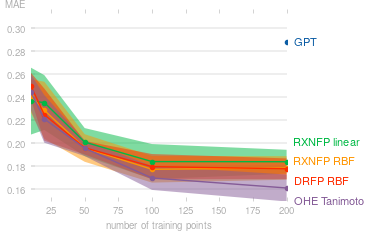

In [57]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)
    ax.plot(
        compiled_grouped_res.loc["DreherDoyle", :].index,
        compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
        label="GPT",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["DreherDoyle", :].index,
        compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
        - compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"],
        compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
        + compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_rxnfp_linear_grouped.index,
        compiled_rxnfp_linear_grouped["mae"]["mean"],
        label="RXNFP linear",
        marker="o",
    )

    ax.fill_between(
        compiled_rxnfp_linear_grouped.index,
        compiled_rxnfp_linear_grouped["mae"]["mean"] - compiled_rxnfp_linear_grouped["mae"]["std"],
        compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_rxnfp_rbf_grouped.index,
        compiled_rxnfp_rbf_grouped["mae"]["mean"],
        label="RXNFP RBF",
        marker="o",
    )

    ax.fill_between(
        compiled_rxnfp_rbf_grouped.index,
        compiled_rxnfp_rbf_grouped["mae"]["mean"] - compiled_rxnfp_rbf_grouped["mae"]["std"],
        compiled_rxnfp_rbf_grouped["mae"]["mean"] + compiled_rxnfp_rbf_grouped["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_drfp_linear_grouped.index,
        compiled_drfp_linear_grouped["mae"]["mean"],
        label="DRFP RBF",
        marker="o",
    )

    ax.fill_between(
        compiled_drfp_linear_grouped.index,
        compiled_drfp_linear_grouped["mae"]["mean"] - compiled_drfp_linear_grouped["mae"]["std"],
        compiled_drfp_linear_grouped["mae"]["mean"] + compiled_drfp_linear_grouped["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_ohe_tanimoto_grouped.index,
        compiled_ohe_tanimoto_grouped["mae"]["mean"],
        label="OHE Tanimoto",
        marker="o",
    )

    ax.fill_between(
        compiled_ohe_tanimoto_grouped.index,
        compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["std"],
        compiled_ohe_tanimoto_grouped["mae"]["mean"] + compiled_ohe_tanimoto_grouped["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE")
    # ax.set_xscale('log')

fig.savefig("suzuki_regression_res.pdf", bbox_inches="tight")